In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [3]:
initial_data = yf.download("AAPL ^VIX", start ="2020-03-01", end="2021-03-01")

[*********************100%***********************]  2 of 2 completed


In [4]:
initial_data.head()

Adj Close                 Close                  High             \
                 AAPL       ^VIX       AAPL       ^VIX       AAPL       ^VIX   
Date                                                                           
2020-03-02  74.127892  33.419998  74.702499  33.419998  75.360001  40.410000   
2020-03-03  71.773636  36.820000  72.330002  36.820000  76.000000  41.060001   
2020-03-04  75.102829  31.990000  75.684998  31.990000  75.849998  35.580002   
2020-03-05  72.666725  39.619999  73.230003  39.619999  74.887497  42.840000   
2020-03-06  71.701706  41.939999  72.257500  41.939999  72.705002  54.389999   

                  Low                  Open                Volume       
                 AAPL       ^VIX       AAPL       ^VIX       AAPL ^VIX  
Date                                                                    
2020-03-02  69.430000  31.500000  70.570000  38.540001  341397200    0  
2020-03-03  71.449997  24.930000  75.917503  33.650002  319475600    0  
2020-03-04  73.282501  30.299999  74.110001  34.439999  219178400    0  
2020-03-05  72.852501  33.540001  73.879997  33.610001  187572800    0  
2020-03-06  70.307503  40.840000  70.500000  48.930000  226176800    0

In [5]:
initial_data['Adj Close'].head()

,AAPL,^VIX
Date,,
2020-03-02,74.127892,33.419998
2020-03-03,71.773636,36.820000
2020-03-04,75.102829,31.990000
2020-03-05,72.666725,39.619999
2020-03-06,71.701706,41.939999


In [6]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-02 to 2021-02-26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   ^VIX    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

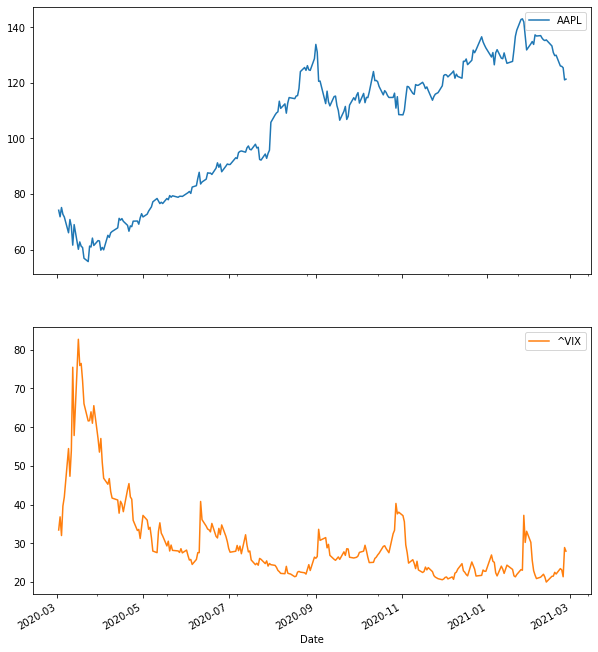

In [7]:
data.plot(figsize=(10, 12), subplots=True)

In [8]:
data.describe().round(2)

,AAPL,^VIX
count,251.00,251.00
mean,103.37,30.47
std,24.00,11.23
min,55.66,19.97
25%,79.73,23.22
50%,112.37,26.97
75%,122.65,33.07
max,142.95,82.69


In [9]:
data.diff().head()

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-2.354256,3.400002
2020-03-04,3.329193,-4.830000
2020-03-05,-2.436104,7.629999
2020-03-06,-0.965019,2.320000


In [10]:
data.diff().describe().round(2)

,AAPL,^VIX
count,250.00,250.00
mean,0.19,-0.02
std,2.69,3.66
min,-10.49,-17.64
25%,-1.09,-1.37
50%,0.15,-0.30
75%,1.71,0.90
max,10.02,24.86


In [11]:
data.pct_change().round(4).head()

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0318,0.1017
2020-03-04,0.0464,-0.1312
2020-03-05,-0.0324,0.2385
2020-03-06,-0.0133,0.0586


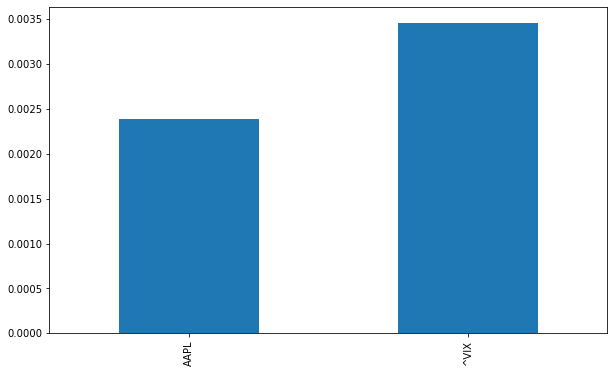

In [12]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [13]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0323,0.0969
2020-03-04,0.0453,-0.1406
2020-03-05,-0.0330,0.2139
2020-03-06,-0.0134,0.0569


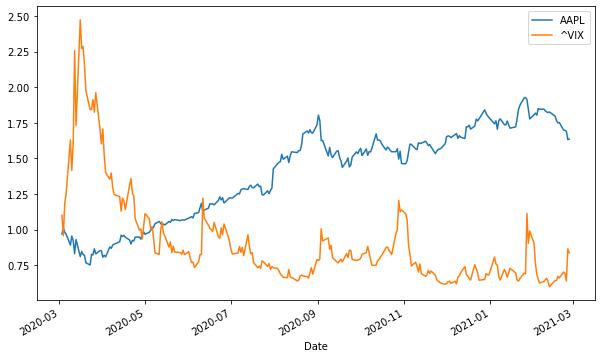

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [16]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-05-07')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210507P00085000,2021-03-30 19:59:08,85.0,0.15,0.11,0.14,0.000000,0.000000,4,45,0.566411,False,REGULAR,USD
1,AAPL210507P00095000,2021-04-01 17:50:58,95.0,0.26,0.22,0.26,-0.050000,-16.129036,25,174,0.470708,False,REGULAR,USD
2,AAPL210507P00100000,2021-04-01 19:59:56,100.0,0.34,0.32,0.36,-0.080000,-19.047615,180,831,0.418951,False,REGULAR,USD
3,AAPL210507P00105000,2021-04-01 19:56:30,105.0,0.54,0.51,0.55,-0.140000,-20.588232,118,279,0.374274,False,REGULAR,USD
4,AAPL210507P00107000,2021-04-01 19:59:56,107.0,0.66,0.64,0.66,-0.150000,-18.518515,105,450,0.356940,False,REGULAR,USD
5,AAPL210507P00108000,2021-04-01 19:39:58,108.0,0.75,0.71,0.75,-0.150000,-16.666664,40,215,0.352057,False,REGULAR,USD
6,AAPL210507P00109000,2021-04-01 17:13:13,109.0,0.84,0.79,0.84,-0.220000,-20.754715,18,76,0.345710,False,REGULAR,USD
7,AAPL210507P00110000,2021-04-01 19:58:29,110.0,0.93,0.90,0.95,-0.300000,-24.390244,207,573,0.340583,False,REGULAR,USD
8,AAPL210507P00111000,2021-04-01 19:57:46,111.0,1.02,1.02,1.08,-0.290000,-22.137402,66,182,0.335944,False,REGULAR,USD
9,AAPL210507P00112000,2021-04-01 19:14:52,112.0,1.24,1.16,1.22,-0.260000,-17.333334,39,121,0.330817,False,REGULAR,USD


In [17]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [18]:
data['Adj Close']

Date
2020-03-02     74.127892
2020-03-03     71.773636
2020-03-04     75.102829
2020-03-05     72.666725
2020-03-06     71.701706
                 ...    
2021-02-22    126.000000
2021-02-23    125.860001
2021-02-24    125.349998
2021-02-25    120.989998
2021-02-26    121.260002
Name: Adj Close, Length: 251, dtype: float64

In [19]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.45732933573445084

In [20]:
data = yf.download("AAPL", start="2020-09-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [21]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.37784909941441586

In [22]:
S0 = 121             # spot stock price
K = 120               # strike
T = 1/12                 # maturity 
r = 0.0083                 # risk free rate 
sig = 0.46               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [23]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u    

In [24]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [25]:
S

array([[121.        , 130.64153681, 141.05133173, 152.2906012 ],
       [  0.        , 112.07002274, 121.        , 130.64153681],
       [  0.        ,   0.        , 103.79909087, 112.07002274],
       [  0.        ,   0.        ,   0.        ,  96.1385659 ]])

In [26]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4823450403177774

In [27]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  7.92997726],
       [ 0.        ,  0.        ,  0.        , 23.8614341 ]])

In [28]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 1.0


In [29]:
data = yf.download("AAPL", start="2020-03-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [30]:
data['Adj Close']

Date
2020-03-02     74.127892
2020-03-03     71.773636
2020-03-04     75.102829
2020-03-05     72.666725
2020-03-06     71.701706
                 ...    
2021-02-22    126.000000
2021-02-23    125.860001
2021-02-24    125.349998
2021-02-25    120.989998
2021-02-26    121.260002
Name: Adj Close, Length: 251, dtype: float64

In [31]:
S = data['Adj Close'][-1]
K = opt.puts['strike']
T = 1/12
r = 0.0083
q = 0.0069
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.45732933573445084

In [32]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S


In [33]:
T = 1/12
r = 0.0083
sigma = 0.46
S0 = 121
K = 120

In [34]:
S = mcs_simulation_np(1000)

In [35]:
S = np.transpose(S)
S

array([[121.        , 121.97848167, 121.67393438, ..., 123.06171565,
        123.18124507, 122.19840213],
       [121.        , 122.51412848, 121.99984819, ..., 103.03458036,
        103.18722906, 102.95906752],
       [121.        , 120.51555517, 120.49764921, ..., 122.79949624,
        123.01497788, 123.97375196],
       ...,
       [121.        , 121.79848158, 121.81431197, ..., 135.99454443,
        135.62312545, 136.18765169],
       [121.        , 120.40355573, 119.78760196, ..., 125.04434563,
        124.95936554, 125.95056236],
       [121.        , 120.42247097, 120.6733733 , ..., 108.53690806,
        108.73032601, 108.3391547 ]])

In [36]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.9820179820179821


In [37]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [38]:
delta(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

-0.44811674136003143

In [39]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

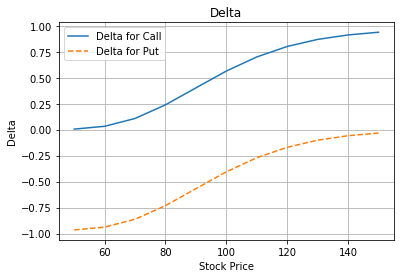

In [40]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [42]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [43]:
gamma(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

0.02460369449451104

In [44]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 121, 1/12, 0.0083, 0.0069, 0.46, 'put')

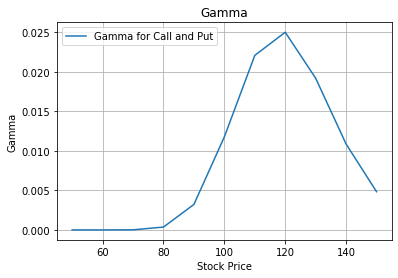

In [45]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [46]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [47]:
speed(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

0.00011607430723121085

In [48]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 121, 1/12, 0.0083, 0.0069, 0.46, 'put')

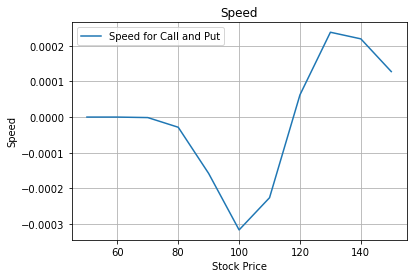

In [49]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [50]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [51]:
theta(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

38.24072998996294

In [52]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(121, 120, T[i], 0.0083, 0.0069, 0.46, 'call')
    Theta_Put [i] = theta(121, 120, T[i], 0.0083, 0.0069, 0.46, 'put')

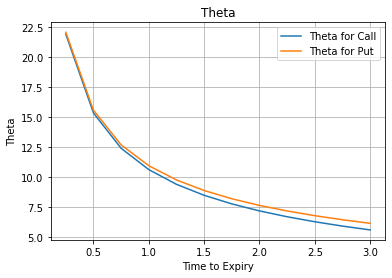

In [53]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [54]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [55]:
vega(121, 120, 1/12, 0.0083, 0.0069, 0.46, 'put')

13.81014758184436

In [56]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(121, 120, 1/12, 0.0083, 0.0069, vol[i], 'put')

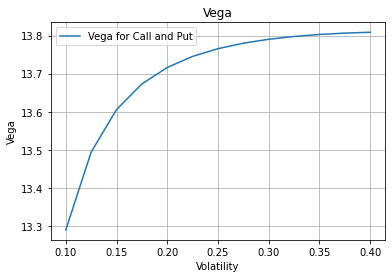

In [57]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])